# Day 15: Encoding Categorical Data in Python - Expanded with Mathematical Implications

## Objective

Deepen the understanding of encoding categorical data in Python by delving into the mathematical implications of each encoding technique, focusing on how they transform data and the influence this transformation has on analysis and model performance.

### Prerequisites

-   Intermediate Python, Pandas, NumPy, and Scikit-Learn skills.
-   Basic understanding of statistical concepts and data preprocessing.
-
- Example Dataset:  https://github.com/100daysofml/100daysofml.github.io/blob/main/content/Week_03/titanic.csv
- Activity Dataset:https://github.com/100daysofml/100daysofml.github.io/blob/main/content/Week_03/adult_data.csv

## Introduction to Types of Categorical Data

Categorical data, essential in many datasets, can be classified primarily into two types:

1.  **Nominal Data (Unordered)**: Categories have no intrinsic order. E.g., Colors (Red, Blue), Gender (Male, Female).
2.  **Ordinal Data (Ordered)**: Categories have a logical order or ranking. E.g., Education level (High School, Bachelor's, Master's), Satisfaction rating (Unsatisfied, Neutral, Satisfied).

**Cardinality**, the number of unique categories in a feature, is crucial. High cardinality features can pose challenges for encoding due to increased dimensionality.

## Implementing Encoding Techniques

### Loading the Dataset
```python
import pandas as pd

titanic_data = pd.read_csv('titanic.csv')

print(titanic_data.head())
```

### Understanding the Data

Identify nominal, ordinal, and cardinal features in the Titanic dataset:

-   **Nominal**: 'Embarked' (C = Cherbourg, Q = Queenstown, S = Southampton)
-   **Ordinal**: 'Pclass' (1 = 1st, 2 = 2nd, 3 = 3rd)
-   **Cardinal**: 'Cabin' (C85, C123, E46, ...)

## Mathematical Implications of Encoding Techniques

### Binary Encoding (for High Cardinality Features)

-   **Concept**: Converts categories into binary code, resulting in fewer features compared to one-hot encoding.
-   **Mathematical Rationale**: Each binary digit represents a power of 2, efficiently encapsulating information even when the number of categories is large. This reduces the feature space dimensionality, preventing the "curse of dimensionality" in model training.

### One-Hot Encoding (for Nominal Data)

-   **Concept**: Creates a binary column for each category, with only one active state.
-   **Formula**: For a feature with `n` categories, it creates `n` binary columns.
-   **Mathematical Rationale**: Eliminates ordinal relationships between categories by treating each category as independent. However, it increases the feature space linearly with the number of categories, which can lead to sparse matrices and potentially overfitting in models.

### Label Encoding (for Ordinal Data)

-   **Concept**: Converts each category into a unique integer.
-   **Mathematical Rationale**: Preserves the ordinal nature of the data, ensuring that the model interprets the inherent order. However, it can be misleading if applied to nominal data, as it might introduce an artificial order that doesn't exist.

## Implementing Encoding Techniques with Mathematical Context

### Binary Encoding Example (High Cardinality Feature: 'Cabin')
```python
import category_encoders as ce

encoder = ce.BinaryEncoder(cols=['Cabin'])
titanic_binary_encoded = encoder.fit_transform(titanic_data['Cabin'])

print("Binary Encoding for 'Cabin':")
print(titanic_binary_encoded.head())
```
-   **Mathematical Insight**: Observe how each unique cabin is represented by a combination of binary digits, significantly reducing the feature space compared to one-hot encoding.

### One-Hot Encoding Example (Nominal Data: 'Embarked')
```python
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()
titanic_one_hot_encoded = encoder.fit_transform(titanic_data[['Embarked']])
titanic_one_hot_encoded_df = pd.DataFrame(titanic_one_hot_encoded.toarray(), columns=encoder.get_feature_names_out(['Embarked']))

print("One-Hot Encoding for 'Embarked':")
print(titanic_one_hot_encoded_df.head())
```
-   **Mathematical Insight**: Each row has only one '1' and the rest '0's, ensuring that the categories are mutually exclusive and equally weighted.

### Label Encoding Example (Ordinal Data: 'Pclass')
```python
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
titanic_data['Pclass_encoded'] = encoder.fit_transform(titanic_data['Pclass'])

print("Label Encoding for 'Pclass':")
print(titanic_data[['Pclass', 'Pclass_encoded']].head())
```
-   **Mathematical Insight**: The encoding reflects the natural order of classes (1st > 2nd > 3rd), allowing models to interpret this hierarchy correctly.

## Best Practices and Mathematical Considerations

-   **Avoid Data Leakage**: Ensure that the encoding is fit only on the training set to avoid leakage of information from the test set.
-   **Prevent Dummy Variable Trap**: In one-hot encoding, drop one encoded column to avoid multicollinearity, a situation where variables are highly correlated.
-   **Mind the Ordinality**: Apply label encoding for ordinal data to preserve the order. Use one-hot or binary encoding for nominal data to avoid introducing fictitious ordinality.
-   **Manage Cardinality**: High cardinality in one-hot encoding can lead to a large number of features. Binary encoding can be a more efficient alternative in such cases.

### Deep Dive into Visualization and Analysis Post-Data Encoding

After encoding categorical data, visualize and analyze the transformed data to understand the impact of encoding on the dataset's structure and the potential implications for model performance.

1.  **Visualization Techniques:**
    
    -   **Histograms:** Use histograms to visualize the frequency distribution of encoded features.
    -   **Bar Plots:** Use bar plots to compare the frequency of categories before and after encoding.
    -   **Pair Plots:** Use pair plots to visualize pairwise relationships between features.
2.  **Analytical Assessment:**
    
    -   **Compare statistical summaries before and after encoding.**
    -   **Observe changes in correlation between features.**
    -   **Evaluate the impact of encoding on model performance using metrics like accuracy, precision, and recall.**

In these statistical summaries, for the encoded data, you'll be mostly looking at counts, means, and standard deviations for the binary variables created through the encoding process. The mean can give you a sense of the prevalence of each category in binary terms, and the standard deviation provides insights into the variance of these binary representations.

Remember, after encoding, the interpretability of the statistical summary changes. While means and standard deviations have clear interpretations for continuous data, their meaning is different for binary-encoded data. Here, the mean represents the proportion of 1s (or 'presence' of a feature), and the standard deviation represents the binary distribution's spread.

Analyzing the visualizations and statistical summaries can give you insights into how encoding has transformed your data and what implications it may have for your analysis or model training.

# Activity: Deep Dive with Titanic Dataset

## Objective

Explore the nuances of encoding categorical data in Python, focusing on different techniques and their implications on data structure and model performance, using the Titanic dataset as an example.

## Prerequisites

-   Intermediate knowledge of Python, Pandas, NumPy, and Scikit-Learn.
-   Familiarity with data visualization libraries like Matplotlib and Seaborn.
-   Understanding of basic statistical concepts.
- Dataset: https://github.com/100daysofml/100daysofml_notebooks/blob/main/content/Week_03/adult_data.csv

## Dataset Overview

The Titanic dataset provides a mix of categorical and numerical features, making it ideal for demonstrating various encoding techniques. The dataset includes details of passengers such as Class, Sex, Age, and whether they survived the sinking.

### Step 1: Load the necessary libraries

In [6]:
!pip install category_encoders

In [7]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
import category_encoders as ce

### Step 2: Load the Titanic dataset

In [11]:
# Load the Titanic dataset
titanic_data = pd.read_csv('titanic.csv')  # Replace with the correct path
pd.set_option('display.max_columns', None)
print(titanic_data.head())

# Output:
#   PassengerId  Pclass  Name  Sex  Age  SibSp  Parch  Ticket  Fare  Cabin  Embarked  Survived
# 0          892       3  Kelly, Mr. James  male  34.5      0      0  330911  7.8292   NaN        Q         0
# 1          893       3  Wilkes, Mrs. James (Ellen Needs)  female  47.0      1      0  363272  7.0000   NaN        S         1
# ... (additional rows)`

   PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  Survived  
0  34.5      0      0   330911   7.8292   NaN        Q         0  
1  47.0      1      0   363272   7.0000   NaN        S         1  
2  62.0      0      0   240276   9.6875   NaN        Q         0  
3  27.0      0      0   315154   8.6625   NaN        S         0  
4  22.0      1      1  3101298  12.2875   NaN        S         1  


### Step 3: Categorical Data Identification

Before encoding, it's crucial to understand the types of categorical data present in the dataset.

In [25]:
# Identify the types of categorical data in the Titanic dataset
print("\nData types and unique values in each categorical column:\n")
for col in titanic_data.select_dtypes(include='object').columns:
    print(f"{col}:    \t\t{titanic_data[col].nunique()}\tunique values")


Data types and unique values in each categorical column:

Name:    		418	unique values
Sex:    		2	unique values
Ticket:    		363	unique values
Cabin:    		76	unique values
Embarked:    		3	unique values


### Step 4: Encoding Techniques and Visualization

### A. Binary Encoding for 'Cabin' (High Cardinality Feature)

Binary encoding is efficient for high cardinality features as it significantly reduces the feature space compared to one-hot encoding.


Binary Encoding for 'Cabin':
   Cabin_0  Cabin_1  Cabin_2  Cabin_3  Cabin_4  Cabin_5  Cabin_6
0        1        0        0        1        1        0        1
1        1        0        0        1        1        0        1
2        1        0        0        1        1        0        1
3        1        0        0        1        1        0        1
4        1        0        0        1        1        0        1


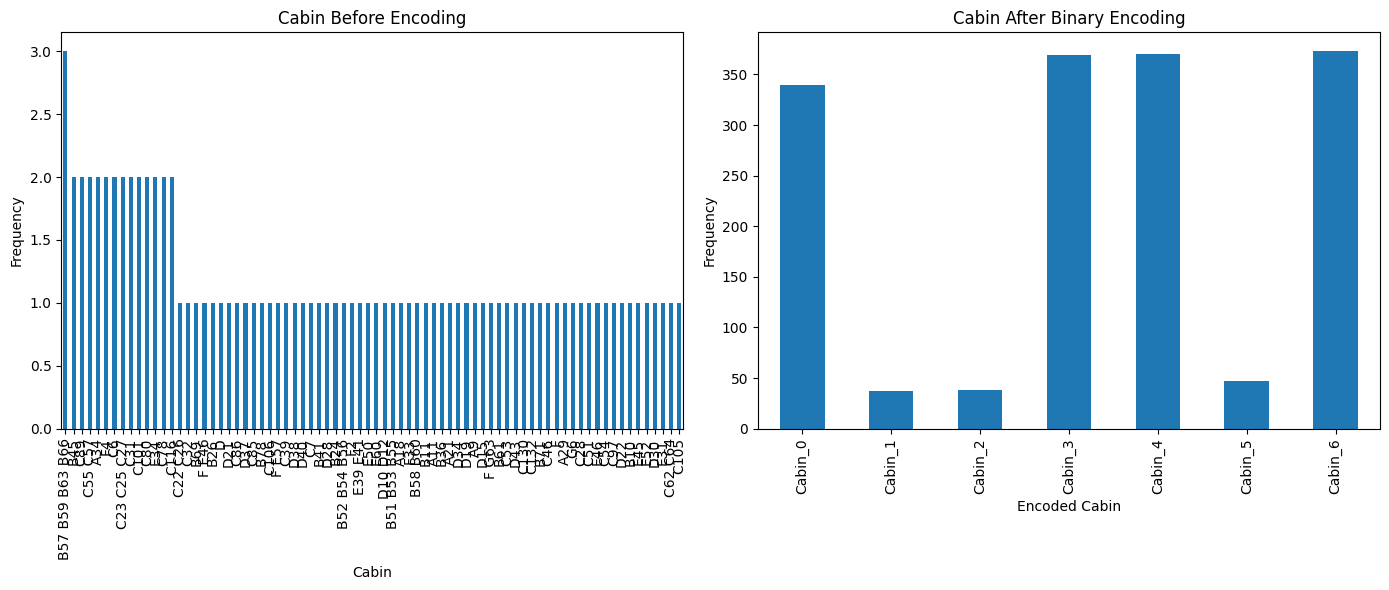

In [26]:
# Binary Encoding for 'Cabin'
encoder = ce.BinaryEncoder(cols=['Cabin'])
titanic_binary_encoded = encoder.fit_transform(titanic_data['Cabin'])

print("\nBinary Encoding for 'Cabin':")
print(titanic_binary_encoded.head())

# Visualization for 'Cabin' before and after Binary Encoding
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
titanic_data['Cabin'].value_counts().plot(kind='bar')
plt.title('Cabin Before Encoding')
plt.xlabel('Cabin')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
titanic_binary_encoded.sum(axis=0).plot(kind='bar')
plt.title('Cabin After Binary Encoding')
plt.xlabel('Encoded Cabin')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

### B. One-Hot Encoding for 'Embarked' (Nominal Data)

One-hot encoding is perfect for nominal data without an intrinsic order as it prevents introducing any ordinal relationship.


One-Hot Encoding for 'Embarked':
   Embarked_C  Embarked_Q  Embarked_S
0         0.0         1.0         0.0
1         0.0         0.0         1.0
2         0.0         1.0         0.0
3         0.0         0.0         1.0
4         0.0         0.0         1.0


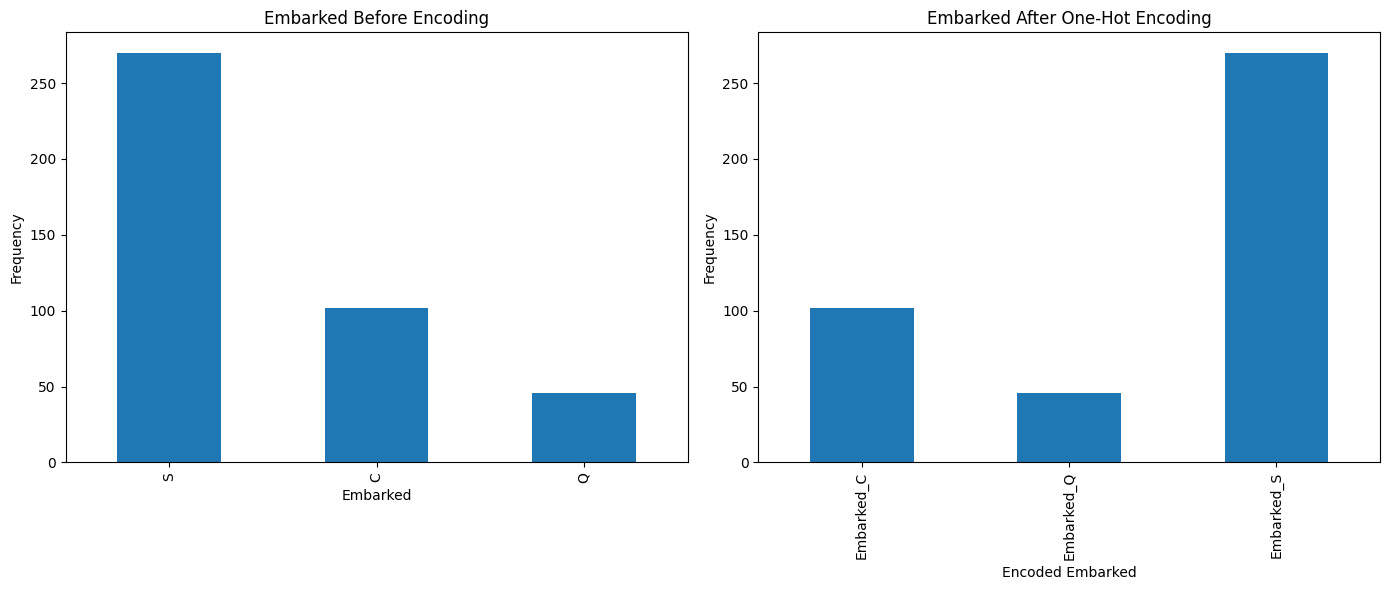

In [27]:
# One-Hot Encoding for 'Embarked'
encoder = OneHotEncoder()
titanic_one_hot_encoded = encoder.fit_transform(titanic_data[['Embarked']])
titanic_one_hot_encoded_df = pd.DataFrame(titanic_one_hot_encoded.toarray(), columns=encoder.get_feature_names_out(['Embarked']))

print("\nOne-Hot Encoding for 'Embarked':")
print(titanic_one_hot_encoded_df.head())

# Visualization for 'Embarked' before and after One-Hot Encoding
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
titanic_data['Embarked'].value_counts().plot(kind='bar')
plt.title('Embarked Before Encoding')
plt.xlabel('Embarked')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
titanic_one_hot_encoded_df.sum(axis=0).plot(kind='bar')
plt.title('Embarked After One-Hot Encoding')
plt.xlabel('Encoded Embarked')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

### C. Label Encoding for 'Pclass' (Ordinal Data)

Label encoding is suitable for ordinal data as it preserves the natural order within the categories.


Label Encoding for 'Pclass':
   Pclass  Pclass_encoded
0       3               2
1       3               2
2       2               1
3       3               2
4       3               2


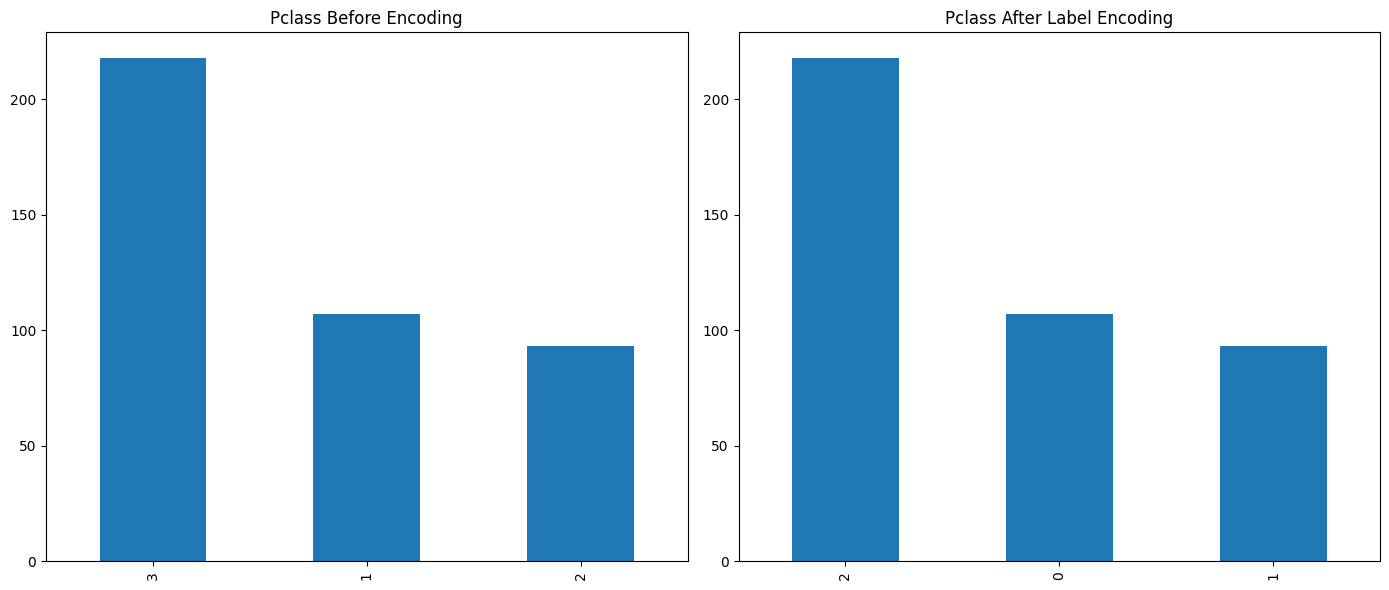

In [28]:
# Label Encoding for 'Pclass'
encoder = LabelEncoder()
titanic_data['Pclass_encoded'] = encoder.fit_transform(titanic_data['Pclass'])

print("\nLabel Encoding for 'Pclass':")
print(titanic_data[['Pclass', 'Pclass_encoded']].head())

# Visualization for 'Pclass' before and after Label Encoding
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
titanic_data['Pclass'].value_counts().plot(kind='bar')
plt.title('Pclass Before Encoding')

plt.subplot(1, 2, 2)
titanic_data['Pclass_encoded'].value_counts().plot(kind='bar')
plt.title('Pclass After Label Encoding')
plt.tight_layout()
plt.show()

## Step 5: Statistical Summary Post-Encoding

Assessing the impact of encoding techniques on the dataset's structure and characteristics is crucial for understanding the transformation.

In [30]:
# Statistical Summary before and after encoding
print("\nStatistical Summary for 'Cabin' before encoding:\n")
print(titanic_data['Cabin'].describe())


Statistical Summary for 'Cabin' before encoding:

count                  91
unique                 76
top       B57 B59 B63 B66
freq                    3
Name: Cabin, dtype: object


In [31]:
print("\nStatistical Summary for 'Cabin' after Binary Encoding:\n")
print(titanic_binary_encoded.describe())


Statistical Summary for 'Cabin' after Binary Encoding:

          Cabin_0     Cabin_1     Cabin_2     Cabin_3     Cabin_4     Cabin_5  \
count  418.000000  418.000000  418.000000  418.000000  418.000000  418.000000   
mean     0.813397    0.088517    0.090909    0.882775    0.885167    0.112440   
std      0.390059    0.284385    0.287824    0.322074    0.319202    0.316286   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      1.000000    0.000000    0.000000    1.000000    1.000000    0.000000   
50%      1.000000    0.000000    0.000000    1.000000    1.000000    0.000000   
75%      1.000000    0.000000    0.000000    1.000000    1.000000    0.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

          Cabin_6  
count  418.000000  
mean     0.892344  
std      0.310316  
min      0.000000  
25%      1.000000  
50%      1.000000  
75%      1.000000  
max      1.000000  


In [32]:
print("\nStatistical Summary for 'Embarked' before encoding:")
print(titanic_data['Embarked'].describe())


Statistical Summary for 'Embarked' before encoding:
count     418
unique      3
top         S
freq      270
Name: Embarked, dtype: object


In [33]:
print("\nStatistical Summary for 'Embarked' after One-Hot Encoding:")
print(titanic_one_hot_encoded_df.describe())


Statistical Summary for 'Embarked' after One-Hot Encoding:
       Embarked_C  Embarked_Q  Embarked_S
count  418.000000  418.000000  418.000000
mean     0.244019    0.110048    0.645933
std      0.430019    0.313324    0.478803
min      0.000000    0.000000    0.000000
25%      0.000000    0.000000    0.000000
50%      0.000000    0.000000    1.000000
75%      0.000000    0.000000    1.000000
max      1.000000    1.000000    1.000000


In [34]:
print("\nStatistical Summary for 'Pclass' before encoding:")
print(titanic_data['Pclass'].describe())


Statistical Summary for 'Pclass' before encoding:
count    418.000000
mean       2.265550
std        0.841838
min        1.000000
25%        1.000000
50%        3.000000
75%        3.000000
max        3.000000
Name: Pclass, dtype: float64


In [35]:
print("\nStatistical Summary for 'Pclass' after Label Encoding:")
print(titanic_data['Pclass_encoded'].describe())


Statistical Summary for 'Pclass' after Label Encoding:
count    418.000000
mean       1.265550
std        0.841838
min        0.000000
25%        0.000000
50%        2.000000
75%        2.000000
max        2.000000
Name: Pclass_encoded, dtype: float64


-   **Analytical Assessment**:
    
    -   Compare statistical summaries before and after encoding.
    -   Observe any changes in correlation between features.
    -   Evaluate the impact of encoding on model performance using metrics like accuracy, precision, and recall.

### **Additional Resources (Encoding Categorical Data)**

https://medium.com/aiskunks/categorical-data-encoding-techniques-d6296697a40f

https://www.analyticsvidhya.com/blog/2020/08/types-of-categorical-data-encoding/

https://towardsdatascience.com/categorical-feature-encoding-547707acf4e5

https://machinelearningmastery.com/how-to-prepare-categorical-data-for-deep-learning-in-python/

https://towardsdatascience.com/all-about-categorical-variable-encoding-305f3361fd02